 # Plotting with Plotly

 Put your Parallel Coordinates plotting knowledge to use by using the plot to visaulize and analyze the relationship between sales, foreclosures, and year for Allgehany County in Pennsylvania.

In [1]:
import plotly.express as px
import pandas as pd
from pathlib import Path

 ### Prep Data for Calculating Total Number of Sales and Foreclosures

In [7]:
# Read in data
sales = pd.read_csv(
    Path("../Resources/allegheny_sales.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="SALEDATE",
).dropna()

foreclosures = pd.read_csv(
    Path("../Resources/allegheny_foreclosures.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="filing_date",
).dropna()

# Slice data and get the count of instances by year
foreclosures_grp_cnt = (
    foreclosures[["amount"]].groupby([foreclosures.index.year]).count()
)
sales_grp_cnt = sales[["PRICE"]].groupby([sales.index.year]).count()

# Rename columns to be 'num_sales' and 'num_foreclosures'
sales_grp_cnt.columns = ["num_sales"]
foreclosures_grp_cnt.columns = ["num_foreclosures"]

print(f'Foreclosures Count:\n{foreclosures_grp_cnt}\n')
print(f'Sales Count:\n{sales_grp_cnt}\n')

Foreclosures Count:
             num_foreclosures
filing_date                  
2009                     4716
2010                     4133
2011                     2321
2012                     2893
2013                     2841
2014                     2676
2015                     2431
2016                     2163
2017                     2176
2018                     1922
2019                     1046

Sales Count:
          num_sales
SALEDATE           
2012             85
2013             93
2014             97
2015            108
2016            102
2017            101
2018             94
2019             33



### Concatenate Data

In [12]:
# Concatenate data
realty_transactions = pd.concat([foreclosures_grp_cnt, sales_grp_cnt], axis='columns', join='inner').dropna().reset_index()
realty_transactions

,index,num_foreclosures,num_sales
0,2012,2893,85
1,2013,2841,93
2,2014,2676,97
3,2015,2431,108
4,2016,2163,102
5,2017,2176,101
6,2018,1922,94
7,2019,1046,33


 ### Plot data

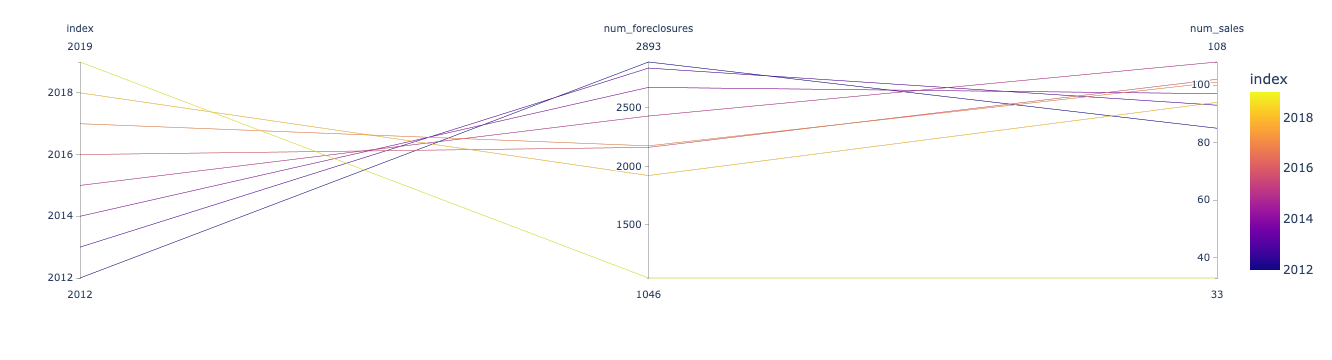

In [13]:
# Plot data using parallel_coordinates plot
px.parallel_coordinates(realty_transactions, color='index')


## Challenge

### Prep Data for Calculating Total Amounts for Sales and Foreclosures

In [5]:
# Group data and calculate total amount in foreclosures and sales by year


# Rename columns to 'amount_from_sales' and 'amount_from_foreclosures'


### Concatenate Data

In [6]:
# Concatenate sums


 ### Plot Data

In [7]:
# Use parallel_coordinates to plot data
